## IMDB 딥러닝 모델 예제
- IMDB 데이터셋은 영화 사이트 IMDB의 리뷰 데이터를 모아놓은 것으로 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터
- 데이터셋은 리뷰 텍스트와 레이블로 구성
- 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시

### 데이터 로드 및 전처리
- imdb.load_data() 함수를 통해 다운로드가 가능
- num_words는 10000개로만 제한하여 데이터를 로드
- 단어의 인덱스는 0부터 9999까지만 구성

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0]) # 단어들의 인덱스가 출력
print(train_labels[0]) # 긍정을 의미하는 1이 출력

17473536/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

IMDB의 데이터셋은 인덱스로만 구성되어 있기 때문에 실제 단어들로 변환하기 위해서는 단어 인덱스 딕셔너리를 이용해야 함.  

imdb.get_word_index() 함수를 통해 얻을 수 있음

In [2]:
word_index = imdb.get_word_index() # imdb.get_word_index() 함수를 통해 얻은 데이터의 index는 단어 출현 빈도 기준으로 내림차수 정렬
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
# 단어, 인덱스 딕셔너리 -> 인덱스, 단어 딕셔너리 형태로 역으로 변환
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [4]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [5]:
word_25th = index_word[25]
print(word_25th)

have


In [6]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [7]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**딥러닝 모델의 학습에 사용하기 위해서는**

- 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법
- 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법

여기서는, 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리하도록 함

In [8]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
print(train_labels[0])
print(test_labels[0])

1
0


In [10]:
# IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환
# 신경망의 출력층에서는 확률값을 반환하므로 확률값을 나타내기 위해서 변환
# 출력이 0에 가까우면 부정, 1에 가까우면 긍정으로 예측
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


### 모델 구성
- input_shape을 (10000, )으로 정의하여 10000 차원의 데이터를 입력으로 받을 수 있게 함

In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

### 모델 컴파일 및 학습
- optimizer는 rmsprop를 사용
- 손실 함수인 loss는 긍정/부정만 분류하므로 binary_crossentropy를 지정
- metrics는 accuracy를 사용
- summary() 함수를 사용해 모델의 구조를 시각화

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 16)                160016    
_________________________________________________________________
hidden (Dense)               (None, 16)                272       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 95ms/step - loss: 0.4808 - accuracy: 0.8140 - val_loss: 0.3671 - val_accuracy: 0.8748
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2770 - accuracy: 0.9052 - val_loss: 0.2893 - val_accuracy: 0.8898
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2095 - accuracy: 0.9258 - val_loss: 0.2786 - val_accuracy: 0.8896
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1767 - accuracy: 0.9372 - val_loss: 0.2848 - val_accuracy: 0.8875
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1504 - accuracy: 0.9490 - val_loss: 0.3041 - val_accuracy: 0.8812
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.1327 - accuracy: 0.9538 - val_loss: 0.3187 - val_accuracy: 0.8795
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1155 - accuracy: 0.9611 - val_loss: 0.3390 - val_accuracy: 0.8746
Epoch 8/20
49

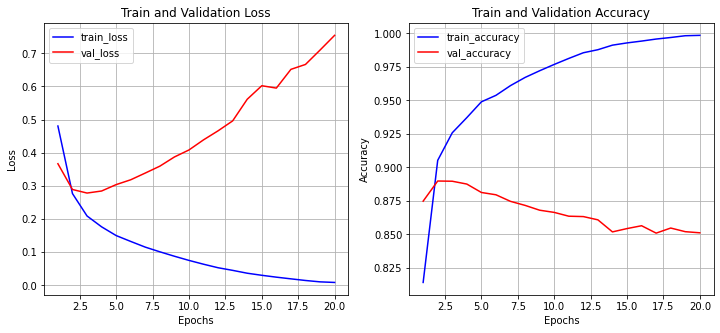

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소  

즉, 과대적합되어 학습용 데이터셋에 대해서만 모델이 적합하게 된 것을 알 수 있음